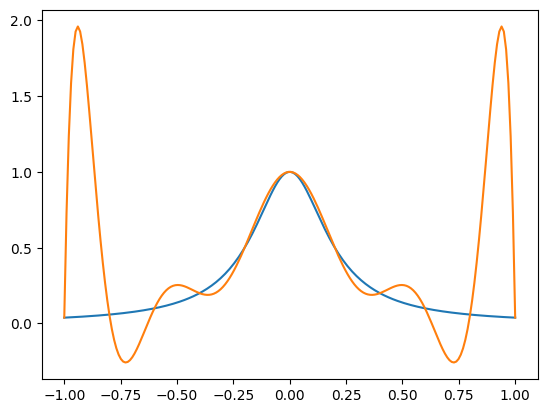

In [1]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from scipy.interpolate import BarycentricInterpolator
from scipy import linalg as la
import time

# Problems 1 and 2
def lagrange(xint, yint, points):
    """Find an interpolating polynomial of lowest degree through the points
    (xint, yint) using the Lagrange method and evaluate that polynomial at
    the specified points.

    Parameters:
        xint ((n,) ndarray): x values to be interpolated.
        yint ((n,) ndarray): y values to be interpolated.
        points((m,) ndarray): x values at which to evaluate the polynomial.

    Returns:
        ((m,) ndarray): The value of the polynomial at the specified points.
    """
    len_x = len(xint)          #determine the number of interpolating points
    len_y = len(yint)
    m = len(points)
    denom = []

    for j in range(len_x):
        temp_array = [xint[j] - xint[i] for i in range(len_x)]       #use the Lagrange method definition to calculate the denominator of each basis function
        urmom = np.delete(temp_array, j)                             #we don't want to include when i = j
        denom.append(np.product(urmom))

    L = [0] * len_x
    for c in range(len_x):
        m_array = []
        for val in points:                                          #calculate the numberator of the function using the Lagrange definition
            prod_array = [val - xint[k] for k in range(len_x)]
            urdad = np.delete(prod_array, c)                        #don't include when k = j
            m_array.append(np.product(urdad) / denom[c])            #combine the numerator and denominator to find the Lagrange interpolation
        L[c] = (m_array)

    n_array = np.array(L)

    p = []

    for f, valu in enumerate(points):                               #sum up each column of the resulting array multiplied by yint to get the Lagrange estimation at each given point
        temp_column = n_array[:, f]
        yeet = temp_column * yint
        p.append(np.sum(yeet))

    return p

def test1():
    x = sy.symbols('x')         #define our symbols
    domain = np.linspace(-1, 1, 200)          #create our domain
 
    g = 1 / (1 + 25*(x**2))            #create a function and lambdify it

    f = sy.lambdify(x, g, "numpy")

    x_vals = np.linspace(-1, 1, 11)
    y_vals = f(x_vals)

    interpol = lagrange(x_vals, y_vals, domain)          #plot our real function vs interpolation to compare

    plt.plot(domain, f(domain))
    plt.plot(domain, interpol)

    plt.show()
test1()

<ipython-input-2-1df316ffc509>:54: RuntimeWarning: divide by zero encountered in double_scalars
  temp = [self.weights[j] * self.yvals[j] / (pt - self.xvals[j]) for j in range(n)]   #use the formula in the lab file to calculate the numerator of the barycentric interpolation
<ipython-input-2-1df316ffc509>:57: RuntimeWarning: divide by zero encountered in double_scalars
  tempo = [self.weights[j] / (pt - self.xvals[j]) for j in range(n)]                  #use the formula in the lab file to calculate the denominator of the barycentric interpolation
<ipython-input-2-1df316ffc509>:63: RuntimeWarning: invalid value encountered in double_scalars
  p = [numer[i] / denom[i] for i in range(q)]                                           #combine the num and denom to get final answer
<ipython-input-2-1df316ffc509>:54: RuntimeWarning: divide by zero encountered in double_scalars
  temp = [self.weights[j] * self.yvals[j] / (pt - self.xvals[j]) for j in range(n)]   #use the formula in the lab file to 

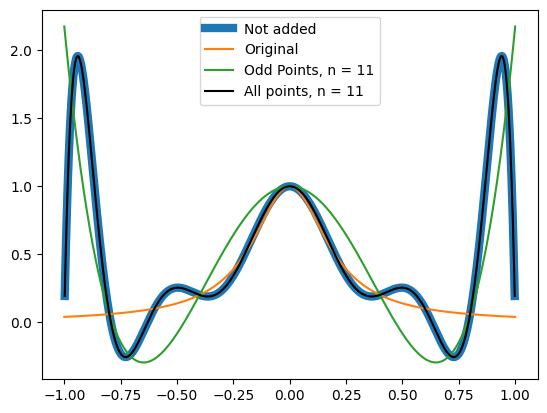

In [2]:
# Problems 3 and 4
class Barycentric:
    """Class for performing Barycentric Lagrange interpolation.

    Attributes:
        w ((n,) ndarray): Array of Barycentric weights.
        n (int): Number of interpolation points.
        x ((n,) ndarray): x values of interpolating points.
        y ((n,) ndarray): y values of interpolating points.
    """

    def __init__(self, xint, yint):
        """Calculate the Barycentric weights using initial interpolating points.

        Parameters:
            xint ((n,) ndarray): x values of interpolating points.
            yint ((n,) ndarray): y values of interpolating points.
        """ 
        self.xvals = xint            #save the x values and y values as attributes
        self.yvals = yint

        n = len(self.xvals)
        
        w = np.ones(n)

        #C = (np.max(self.xvals) - np.min(self.xvals)) / 4

        shuffle = np.random.permutation(n-1)
 
        for j in range(n):                  #use the algorithm in the lab file to calculate the barycentric weights
            temp = (xint[j] - np.delete(xint, j)) #/ C
            temp = temp[shuffle]
            w[j] /= np.product(temp)

        self.weights = w                       #save the weights as an attribute

    def __call__(self, points):
        """Using the calcuated Barycentric weights, evaluate the interpolating polynomial
        at points.

        Parameters:
            points ((m,) ndarray): Array of points at which to evaluate the polynomial.

        Returns:
            ((m,) ndarray): Array of values where the polynomial has been computed.
        """

        numer = []                      #to ease computation, we will calculate the denominator and numerator separately
        denom = []

        n = len(self.xvals)

        for pt in points:
            temp = [self.weights[j] * self.yvals[j] / (pt - self.xvals[j]) for j in range(n)]   #use the formula in the lab file to calculate the numerator of the barycentric interpolation
            numer.append(np.sum(temp))

            tempo = [self.weights[j] / (pt - self.xvals[j]) for j in range(n)]                  #use the formula in the lab file to calculate the denominator of the barycentric interpolation
            denom.append(np.sum(tempo))
            
        
        q = len(denom)

        p = [numer[i] / denom[i] for i in range(q)]                                           #combine the num and denom to get final answer
        
        return p


    # Problem 4
    def add_weights(self, xint, yint):
        """Update the existing Barycentric weights using newly given interpolating points
        and create new weights equal to the number of new points.

        Parameters:
            xint ((m,) ndarray): x values of new interpolating points.
            yint ((m,) ndarray): y values of new interpolating points.
        """



        for i in range(len(xint)):                     
            w_new = 1 / np.product([xint[i] - self.xvals])        #calculate the new weight

            self.weights /= (self.xvals - xint[i])           #update the existing weights
            self.weights = np.concatenate((self.weights, np.array([w_new])))     #add the new weight to the array of existing weights in our attribute

            self.xvals = np.concatenate((self.xvals, np.array([xint[i]])))        #add the new xvals and yvals to the existing attributes
            self.yvals = np.concatenate((self.yvals, np.array([yint[i]])))
        
def test4():
    n = 11
    runge = lambda x: 1 / (1 + 25 * x**2)
    xvals_original = np.linspace(-1, 1, n)
    xvals_1 = xvals_original[1::2]
    xvals_2 = xvals_original[::2]
    domain = np.linspace(-1, 1, 1000)
    bary = Barycentric(xvals_1, runge(xvals_1))

    bary_2 = Barycentric(xvals_original, runge(xvals_original))
    plt.plot(domain, bary_2(domain),linewidth=6, label='Not added')
    plt.plot(domain, runge(domain), label='Original')
    plt.plot(domain, bary(domain), label='Odd Points, n = ' + str(n))
    bary.add_weights(xvals_2, runge(xvals_2))
    plt.plot(domain, bary(domain),'k', label='All points, n = ' + str(n))
    plt.legend(loc='best')
    plt.show()
test4()

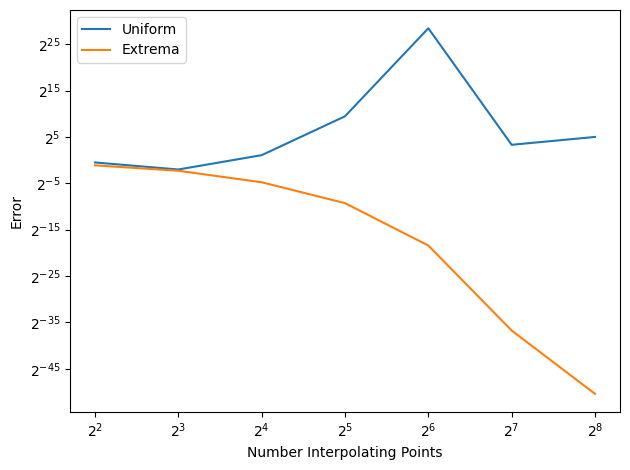

In [3]:
# Problem 5
def prob5():
    """For n = 2^2, 2^3, ..., 2^8, calculate the error of intepolating Runge's
    function on [-1,1] with n points using SciPy's BarycentricInterpolator
    class, once with equally spaced points and once with the Chebyshev
    extremal points. Plot the absolute error of the interpolation with each
    method on a log-log plot.
    """
    
    domain = np.linspace(-1, 1, 400)          #create our domain
    N = 2**np.arange(2,9)                     #the number of points for which we will interpolate
    err_eq = []
    err_max = []
    f = lambda x: 1/(1+25 * x**2)             #define our function
    act_fun = f(domain)

    for n in N:
        x_vals = np.linspace(-1, 1, n)        #calculate our domain
        poly = BarycentricInterpolator(x_vals, f(x_vals))      #use our class to calculate the Barycentric Interpolation of the function
        err_eq.append(la.norm(act_fun - poly(domain), ord=np.inf))     #calculate the error of the interpolation at the equally spaced points

        extr = np.array([np.cos(j * np.pi / n) for j in range(n + 1)])
        poly1 = BarycentricInterpolator(extr, f(extr))                   #calculate the error at the extremal points
        err_max.append(la.norm(act_fun - poly1(domain), ord=np.inf))

    plt.loglog(N, err_eq, base=2, label="Uniform")           #plot the results on a log scale
    plt.loglog(N, err_max, base=2, label="Extrema")
    plt.legend(loc = "upper left")
    plt.xlabel("Number Interpolating Points")
    plt.ylabel("Error")
    plt.tight_layout()
    plt.show()
prob5()

<ipython-input-2-1df316ffc509>:54: RuntimeWarning: divide by zero encountered in double_scalars
  temp = [self.weights[j] * self.yvals[j] / (pt - self.xvals[j]) for j in range(n)]   #use the formula in the lab file to calculate the numerator of the barycentric interpolation
<ipython-input-2-1df316ffc509>:57: RuntimeWarning: divide by zero encountered in double_scalars
  tempo = [self.weights[j] / (pt - self.xvals[j]) for j in range(n)]                  #use the formula in the lab file to calculate the denominator of the barycentric interpolation
<ipython-input-2-1df316ffc509>:63: RuntimeWarning: invalid value encountered in double_scalars
  p = [numer[i] / denom[i] for i in range(q)]                                           #combine the num and denom to get final answer


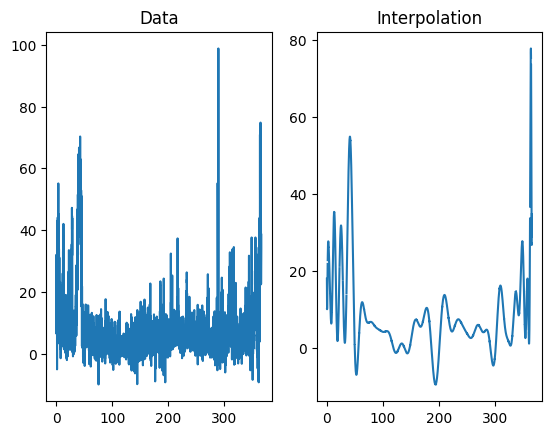

In [4]:
# Problem 6
def chebyshev_coeffs(f, n):
    """Obtain the Chebyshev coefficients of a polynomial that interpolates
    the function f at n points.

    Parameters:
        f (function): Function to be interpolated.
        n (int): Number of points at which to interpolate.

    Returns:
        coeffs ((n+1,) ndarray): Chebyshev coefficients for the interpolating polynomial.
    """
    j = np.arange(n+1)         #calculate the chebychev extremizers

    extr = np.cos(j * np.pi / n)

    f_chebs = f(extr)            #evaluate the function at the extremizers and concatenate the "mirror values" needed to take the dft

    f_chebs = np.concatenate((f_chebs, f_chebs[-2:0:-1]))

    

    a_vals = np.real(np.fft.fft(f_chebs) / (2 * n))      #use the fft to calculate the a values        #take only the real parts

    y = np.array([1 if i in {0,n} else 2 for i in range(2*n)])     #define our gamma function and multiply it by our a values

    coeffs = a_vals * y

    return coeffs[:n+1]

# Problem 7
def prob7(n):
    """Interpolate the air quality data found in airdata.npy using
    Barycentric Lagrange interpolation. Plot the original data and the
    interpolating polynomial.

    Parameters:
        n (int): Number of interpolating points to use.
    """
    data = np.load('airdata.npy')              #load the data

    fx = lambda a, b, n: .5*(a+b + (b-a) * np.cos(np.arange(n+1) * np.pi / n))          #find the closest match in the data to the extremizers
    a, b = 0, 366 - 1/24
    domain = np.linspace(0, b, 8784)              
    points = fx(a, b, n)       
    temp = np.abs(points - domain.reshape(8784, 1))
    temp2 = np.argmin(temp, axis=0)

    poly = Barycentric(domain[temp2], data[temp2])        #create a Barycentric interpolation of the data among the points closest to the extremizers

    plt.subplot(121)                                      #plot the data and our approximation
    plt.plot(domain, data)
    plt.title("Data")
    plt.subplot(122)
    plt.title("Interpolation")
    plt.plot(domain, poly(domain))
    plt.show()
prob7(50)